In [29]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
df

,ds,y
0,2013-01-01,0.000000
1,2013-01-02,23720.568982
2,2013-01-03,17329.638000
3,2013-01-04,15771.261980
4,2013-01-05,22380.072040
...,...,...
1619,2017-06-12,27224.354996
1620,2017-06-13,24254.835000
1621,2017-06-14,30156.123000
1622,2017-06-15,23314.491990


In [31]:
#Data loading and transformation (convert the column that contains timestamp into datetime type) [2 marks]
from datetime import datetime

def conver_string_to_date(string_value):
  return datetime.strptime(string_value, '%Y-%m-%d')

df['dt'] = df['ds'].apply(conver_string_to_date)

df

,ds,y,dt
0,2013-01-01,0.000000,2013-01-01
1,2013-01-02,23720.568982,2013-01-02
2,2013-01-03,17329.638000,2013-01-03
3,2013-01-04,15771.261980,2013-01-04
4,2013-01-05,22380.072040,2013-01-05
...,...,...,...
1619,2017-06-12,27224.354996,2017-06-12
1620,2017-06-13,24254.835000,2017-06-13
1621,2017-06-14,30156.123000,2017-06-14
1622,2017-06-15,23314.491990,2017-06-15


In [33]:
df.dt.dt.day

,dt
0,1
1,2
2,3
3,4
4,5
...,...
1619,12
1620,13
1621,14
1622,15


In [32]:
df_new=df[['dt','y']].set_index('dt')
df_new

,y
dt,
2013-01-01,0.000000
2013-01-02,23720.568982
2013-01-03,17329.638000
2013-01-04,15771.261980
2013-01-05,22380.072040
...,...
2017-06-12,27224.354996
2017-06-13,24254.835000
2017-06-14,30156.123000


<ipython-input-34-eba3745857d7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_new.resample('1M').sum().plot()


<Axes: xlabel='dt'>

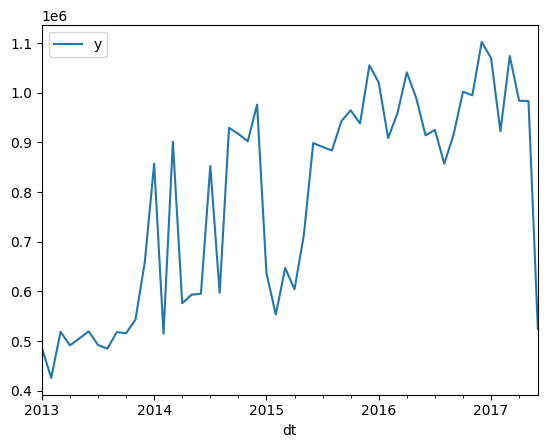

In [34]:
#2. Re-sampling visualization (re-scale and visualize the sum of sale based on time interval of 1 month, 4 month, 6 month, and one year)
df_new.resample('1M').sum().plot()

<ipython-input-35-bf8840f7e0c3>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_new.resample('4M').sum().plot()


<Axes: xlabel='dt'>

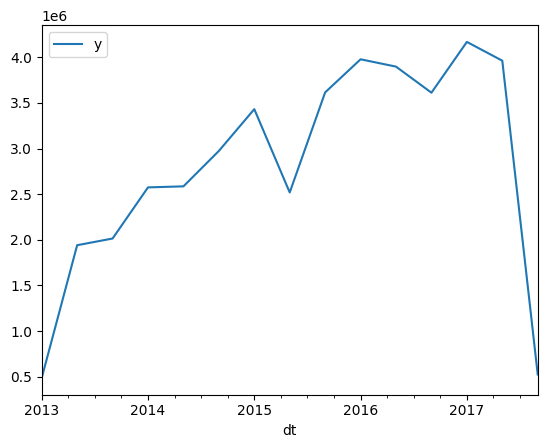

In [35]:
df_new.resample('4M').sum().plot()

<ipython-input-36-a02113f7bb84>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_new.resample('6M').sum().plot()


<Axes: xlabel='dt'>

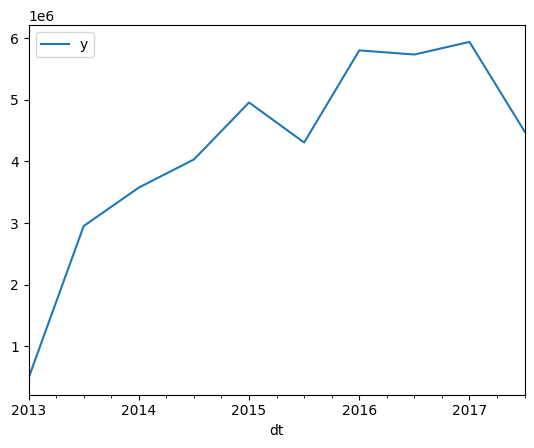

In [36]:
df_new.resample('6M').sum().plot()

<ipython-input-37-8c33da7fb3e9>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_new.resample('1Y').sum().plot()


<Axes: xlabel='dt'>

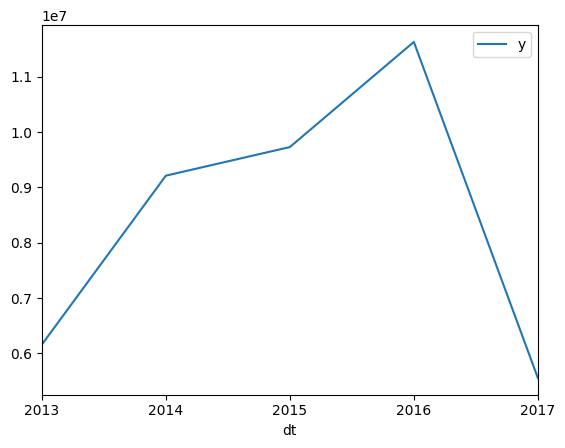

In [37]:
df_new.resample('1Y').sum().plot()

In [38]:
#3. Visualize the timeseries data using plotly
import plotly.express as px
fig=px.line(df_new, x=df_new.index, y=df_new.y)
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()

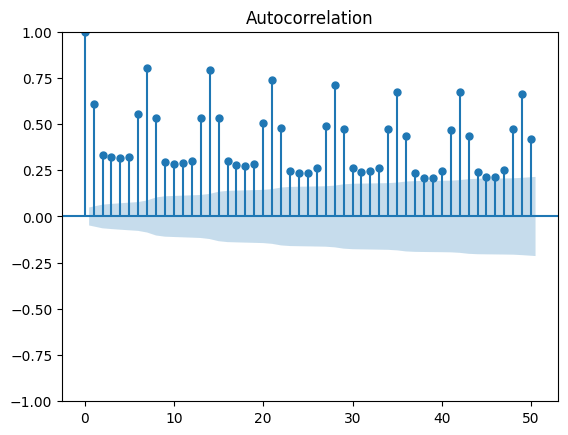

In [39]:
#4.Plot the ACF graph of the time series data
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_new.y, lags=50).show()

In [ ]:
#discuss Is it a stationary time series?
#why?
#The time series is not stationary, because the statistical properties (mean, variance, and autocorrelation)
#change over the time

#What components can you guess based on the visualization and why?
# 1. The trend is increase with the presence of high and autocorrelation shows that the series have a trend component.
#2. Seasonal: The repeated spikes at regular intervals indicate the presence of seasonality,
#This ACF Plot suggests a repeating pattern in the data at specific time intervals.


In [40]:
#Split dataset
from statsmodels.tsa.arima.model import ARIMA
train = df_new.y[:1248]
test = df_new.y[1248:]
train.shape, test.shape

((1248,), (376,))

In [41]:
#ARIMA - Use visualization to guess the possible order for integration with explanation
#ARIMA - Same as 5, but guess the (p) value
#ARIMA - Same as 5, but guess the (q) value
model=ARIMA(train, order=(2,3,2))
#p=2=Number of lag terms, use last 2 lagged value, d=3=Number of times the data is differenced to make it stationary, the data was differenced three times, q=2=Number of lagged forecast errors to include, uses the last 2 forecast errors.
trained_model=model.fit()
trained_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1248
Model:                 ARIMA(2, 3, 2)   Log Likelihood              -12873.379
Date:                Sat, 07 Dec 2024   AIC                          25756.759
Time:                        18:49:17   BIC                          25782.393
Sample:                             0   HQIC                         25766.397
                               - 1248                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1593      0.021     -7.462      0.000      -0.201      -0.117
ar.L2         -0.3868      0.025    -15.298      0.000      -0.436      -0.337
ma.L1         -1.9985      0.034    -59.215      0.000      -2.065      -1.932
ma.L2          1.0000      0.034     29.616      0.000       0.934       1.066
sigma2      5.542e+07   1.22e-09   4.55e+16      0.000    5.54e+07    5.54e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.47   Jarque-Bera (JB):                57.55
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.67e+31. Standard errors may be unstable.
"""

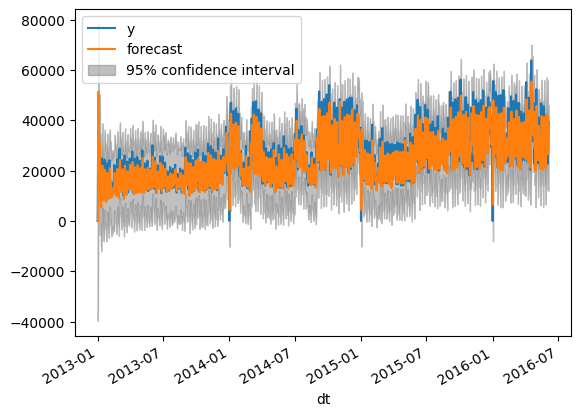

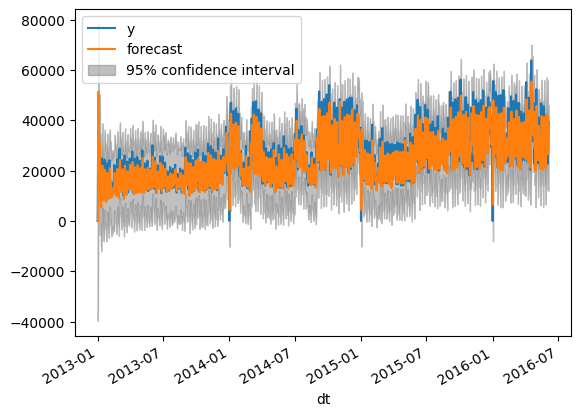

In [42]:
#Train and plot_predict an ARIMA model based on your guess of the hyper-parameters
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
train.plot(ax=ax)
plot_predict(trained_model,ax=ax)

In [43]:
#Forecast and plot the ARIMA prediction on testing set
forecast=trained_model.forecast(365)
forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



,predicted_mean
1248,35508.659739
1249,31976.898321
1250,34077.620505
1251,35118.266784
1252,34133.261352
...,...
1608,-619721.469331
1609,-623384.838795
1610,-627058.440546
1611,-630742.274585


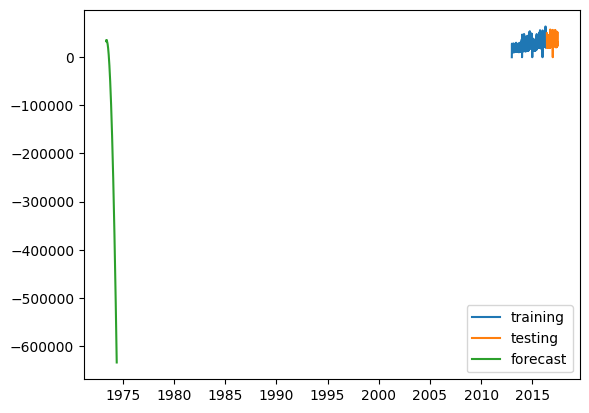

In [46]:
plt.figure()
plt.plot(train, label='training')
plt.plot(test, label='testing')
plt.plot(forecast, label='forecast')
plt.legend()